In [1]:
from memory_profiler import profile
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.pyplot import figure
import seaborn as sns
import random
import sys
from itertools import combinations
import scipy.cluster.hierarchy as shc

%cd ..
from src import sw3c, evolution_simulator
import time


/home/mounim/PHD-Projects/BiNGO-3C/notebooks


In [2]:
Benchmarking = []

In [3]:
size, gap = 11,1
d = 5 # delimiter size

for L in [100,1000,10000,100000]:
    # L = 100
    S1 = evolution_simulator.generate_random_seq(L) #sequence of lenght L
    evolution_simulator.to_fasta(S1,'S1', "./data/Benchmarking/dataset/") #sequence of lenght L

    S2 = evolution_simulator.generate_random_seq(L) #sequence of lenght L
    evolution_simulator.to_fasta(S2,'S2', "./data/Benchmarking/dataset/") #sequence of lenght L


    start = time.time()

    delim = sw3c.random_delimiter(d) #select delimiter
    dictSeqs = sw3c.dict_of_seqs_from_file("./data/Benchmarking/dataset/S1.fasta" ) #load from file
    dicSubseqs = sw3c.dictSubSeq_from_dictSeq(dictSeqs, delim) #remake seqs using delim
    dictKmers1 = sw3c.dictKmer_from_DictSubseq(dicSubseqs, size, gap) # make chunks

    dictSeqs = sw3c.dict_of_seqs_from_file("./data/Benchmarking/dataset/S2.fasta" ) #load from file
    dicSubseqs = sw3c.dictSubSeq_from_dictSeq(dictSeqs, delim) #remake seqs using delim
    dictKmers2 = sw3c.dictKmer_from_DictSubseq(dicSubseqs, size, gap) # make chunks

    for i in dictKmers1.keys(): # S1: ref
        for j in dictKmers2.keys(): # S2: target
            INT = dictKmers1[i].intersection(dictKmers2[j])
            UNI = dictKmers1[i].union(dictKmers2[j])
            Score = len(INT) / len(UNI)


    end = time.time()
    print(end - start)

    Benchmarking.append([' Size: '+str(size)+' gap'+str(gap), L, end - start])

0.0003275871276855469
0.0008275508880615234
0.008341312408447266
0.1884918212890625


In [4]:
size, gap = 11,5
d = 5 # delimiter size

for L in [100,1000,10000,100000]:
    # L = 100
    S1 = evolution_simulator.generate_random_seq(L) #sequence of lenght L
    evolution_simulator.to_fasta(S1,'S1', "./data/Benchmarking/dataset/") #sequence of lenght L

    S2 = evolution_simulator.generate_random_seq(L) #sequence of lenght L
    evolution_simulator.to_fasta(S2,'S2', "./data/Benchmarking/dataset/") #sequence of lenght L


    start = time.time()

    delim = sw3c.random_delimiter(d) #select delimiter
    dictSeqs = sw3c.dict_of_seqs_from_file("./data/Benchmarking/dataset/S1.fasta" ) #load from file
    dicSubseqs = sw3c.dictSubSeq_from_dictSeq(dictSeqs, delim) #remake seqs using delim
    dictKmers1 = sw3c.dictKmer_from_DictSubseq(dicSubseqs, size, gap) # make chunks

    dictSeqs = sw3c.dict_of_seqs_from_file("./data/Benchmarking/dataset/S2.fasta" ) #load from file
    dicSubseqs = sw3c.dictSubSeq_from_dictSeq(dictSeqs, delim) #remake seqs using delim
    dictKmers2 = sw3c.dictKmer_from_DictSubseq(dicSubseqs, size, gap) # make chunks

    for i in dictKmers1.keys(): # S1: ref
        for j in dictKmers2.keys(): # S2: target
            INT = dictKmers1[i].intersection(dictKmers2[j])
            UNI = dictKmers1[i].union(dictKmers2[j])
            Score = len(INT) / len(UNI)

    end = time.time()
    print(end - start)

    Benchmarking.append([' Size: '+str(size)+' gap'+str(gap), L, end - start])

0.01528787612915039
0.00038123130798339844
0.0026504993438720703
0.05252265930175781


In [5]:
size, gap = 11,10
d = 5 # delimiter size

for L in [100,1000,10000,100000]:
    # L = 100
    S1 = evolution_simulator.generate_random_seq(L) #sequence of lenght L
    evolution_simulator.to_fasta(S1,'S1', "./data/Benchmarking/dataset/") #sequence of lenght L

    S2 = evolution_simulator.generate_random_seq(L) #sequence of lenght L
    evolution_simulator.to_fasta(S2,'S2', "./data/Benchmarking/dataset/") #sequence of lenght L


    start = time.time()

    delim = sw3c.random_delimiter(d) #select delimiter
    dictSeqs = sw3c.dict_of_seqs_from_file("./data/Benchmarking/dataset/S1.fasta" ) #load from file
    dicSubseqs = sw3c.dictSubSeq_from_dictSeq(dictSeqs, delim) #remake seqs using delim
    dictKmers1 = sw3c.dictKmer_from_DictSubseq(dicSubseqs, size, gap) # make chunks

    dictSeqs = sw3c.dict_of_seqs_from_file("./data/Benchmarking/dataset/S2.fasta" ) #load from file
    dicSubseqs = sw3c.dictSubSeq_from_dictSeq(dictSeqs, delim) #remake seqs using delim
    dictKmers2 = sw3c.dictKmer_from_DictSubseq(dicSubseqs, size, gap) # make chunks

    for i in dictKmers1.keys(): # S1: ref
        for j in dictKmers2.keys(): # S2: target
            INT = dictKmers1[i].intersection(dictKmers2[j])
            UNI = dictKmers1[i].union(dictKmers2[j])
            Score = len(INT) / len(UNI)

    end = time.time()
    print(end - start)

    Benchmarking.append([' Size: '+str(size)+' gap'+str(gap), L, end - start])

0.0038051605224609375
0.00045943260192871094
0.001873016357421875
0.023487091064453125


In [6]:
pd.DataFrame(Benchmarking)

,0,1,2
0,Size: 11 gap1,100,0.000328
1,Size: 11 gap1,1000,0.000828
2,Size: 11 gap1,10000,0.008341
3,Size: 11 gap1,100000,0.188492
4,Size: 11 gap5,100,0.015288
5,Size: 11 gap5,1000,0.000381
6,Size: 11 gap5,10000,0.002650
7,Size: 11 gap5,100000,0.052523
8,Size: 11 gap10,100,0.003805
9,Size: 11 gap10,1000,0.000459


In [7]:
import os

In [8]:
for L in [100,1000,10000,100000]:
    # L = 100
    S1 = evolution_simulator.generate_random_seq(L) #sequence of lenght L
    S2 = evolution_simulator.generate_random_seq(L) #sequence of lenght L
    sequences_filename = "./data/Benchmarking/dataset/sequences.fasta"
    outfile = open(sequences_filename, 'w+')
    outfile.write('> s1')
    outfile.write(S1)
    outfile.write('> s2')
    outfile.write(S2)

    start = time.time()

    os.system("mafft --auto "+ sequences_filename + ' > outfile')  

    end = time.time()
    print(end - start)

    Benchmarking.append(['MAFFT ', L, end - start])

0.062090396881103516


outputhat23=16
treein = 0
compacttree = 0
minimumweight = 0.000010
autosubalignment = 0.000000
nthread = 0
randomseed = 0
blosum 62 / kimura 200
poffset = 0
niter = 16
sueff_global = 0.100000
nadd = 16

Strategy:
 L-INS-i (Probably most accurate, very slow)
 Iterative refinement method (<16) with LOCAL pairwise alignment information

If unsure which option to use, try 'mafft --auto input > output'.
For more information, see 'mafft --help', 'mafft --man' and the mafft page.

The default gap scoring scheme has been changed in version 7.110 (2013 Oct).
It tends to insert more gaps into gap-rich regions than previous versions.
To disable this change, add the --leavegappyregion option.

outputhat23=16
treein = 0
compacttree = 0
minimumweight = 0.000010
autosubalignment = 0.000000
nthread = 0
randomseed = 0
blosum 62 / kimura 200
poffset = 0
niter = 16
sueff_global = 0.100000
nadd = 16

Strategy:
 L-INS-i (Probably most accurate, very slow)
 Iterative refinement method (<16) with LOCAL pairw

0.057988882064819336
0.06059980392456055
0.06734895706176758


outputhat23=16
treein = 0
compacttree = 0
minimumweight = 0.000010
autosubalignment = 0.000000
nthread = 0
randomseed = 0
blosum 62 / kimura 200
poffset = 0
niter = 16
sueff_global = 0.100000
nadd = 16

Strategy:
 L-INS-i (Probably most accurate, very slow)
 Iterative refinement method (<16) with LOCAL pairwise alignment information

If unsure which option to use, try 'mafft --auto input > output'.
For more information, see 'mafft --help', 'mafft --man' and the mafft page.

The default gap scoring scheme has been changed in version 7.110 (2013 Oct).
It tends to insert more gaps into gap-rich regions than previous versions.
To disable this change, add the --leavegappyregion option.



In [9]:
for L in [100,1000,10000]:
    # L = 100
    S1 = evolution_simulator.generate_random_seq(L) #sequence of lenght L
    S2 = evolution_simulator.generate_random_seq(L) #sequence of lenght L
    sequences_filename = "./data/Benchmarking/dataset/sequences.fasta"
    outfile = open(sequences_filename, 'w+')
    outfile.write('> s1 \n')
    outfile.write(S1)
    print(S1)
    outfile.write(' \n> s2 \n')
    outfile.write(S2)

    start = time.time()

    os.system("clustalw "+ sequences_filename + ' > outfile')  

    end = time.time()
    print(end - start)

    Benchmarking.append(['CLUSTAL-W ', L, end - start])



ERROR: No sequences in file. No alignment!




TCCCGTCTTCTAACACTAAGCCCCAGGAGGTTCCCCACACATTTCACGGTATTAAAGCGTCGTACTAAGGTATCTAGGGCGACCGGGCAGGGGACTGATT
0.0018694400787353516
GGAAAGCATTCAAATTTTCTAGGTCCCTAGAATCAGACGCCCGGTACAGAAAGCAGACGGCTGCGCCAGTACGCGTTACGTTACATGATTTAAGAAAGCCCCGGCCTTTATAGAGTAGTCTGAATATTCCCAGCGGTTCCTGTCAAGCTTACGGTATAGGCGCCCAGTCCAATCTGTCGGTTCGCGAGGAAATTTCATTGGTATGTAATAGTGACCCGTCAAGTTTATCGCCAATGACTCACGACCCCGCTATCATAGACGGGTTCTCAGGGGGGAAGCGCCTAGAACATATCGCCACTGGTTCTGCCGGACGTAAGACTCCCTTCAAAACTTGAAAACGCATGTGAAATGAATATTAGGGTGCAAAGGTCACACTTCTTACCGATGTAGGAGACGAAAATCCACAGTAACGCTCTTTCAGTGACGTGTCTCCGGGTAGGAAATCGTAGCAACTCGGCTTCGATTCGCAGTTGATCGAATAAGAGCAACAACAAAAGGAGACCGGCCCTGGACGCCAGTAACACTGAACTCTGAGTGTACTATGGGCAGGAACATGCACACTCTACAAACACGGTGTTGCAGACGCACATTGGGTCACTTAGGTCCCGCCTTAGTGACCCCTCAGACTTTAAATCTTAAGGCAAGCAGCACAAAATGACCTTTTCACCCCGAATGCGTGGCCGTTGTTTCTGAGATTTGACCACTATGTCTGTCCGCACCAAGTCAGTTAATCCTCTTAGGCTGTGCGGTCTACTAGCTGCCTACGGGGTAATACTTTAGCACTGACTGAGAGCACATACAAAAGGGCCCATGAAGCCCCAGGCACCTAACTATGCATCTGGCCTTACGCCGCACATGCTTGATAAATGACCTTCGT

In [10]:
pd.DataFrame(Benchmarking)

,0,1,2
0,Size: 11 gap1,100,0.000328
1,Size: 11 gap1,1000,0.000828
2,Size: 11 gap1,10000,0.008341
3,Size: 11 gap1,100000,0.188492
4,Size: 11 gap5,100,0.015288
5,Size: 11 gap5,1000,0.000381
6,Size: 11 gap5,10000,0.002650
7,Size: 11 gap5,100000,0.052523
8,Size: 11 gap10,100,0.003805
9,Size: 11 gap10,1000,0.000459


In [11]:
for L in [100,1000,10000,100000]:
    # L = 100
    S1 = evolution_simulator.generate_random_seq(L) #sequence of lenght L
    evolution_simulator.to_fasta(S1,'S1', "./data/Benchmarking/dataset/") #sequence of lenght L

    S2 = evolution_simulator.generate_random_seq(L) #sequence of lenght L
    evolution_simulator.to_fasta(S2,'S2', "./data/Benchmarking/dataset/") #sequence of lenght L


    start = time.time()

    os.system("mash sketch  "+ "./data/Benchmarking/dataset/S1.fasta" )  
    os.system("mash sketch  "+ "./data/Benchmarking/dataset/S2.fasta" )  
    os.system("mash dist  "+ "./data/Benchmarking/dataset/S1.fasta.msh ./data/Benchmarking/dataset/S2.fasta.msh" )  

    end = time.time()
    print(end - start)

    Benchmarking.append([' MASH ', L, end - start])

./data/Benchmarking/dataset/S1.fasta	./data/Benchmarking/dataset/S2.fasta	1	1	0/160
0.005196571350097656
./data/Benchmarking/dataset/S1.fasta	./data/Benchmarking/dataset/S2.fasta	1	1	0/1000
0.004983663558959961
./data/Benchmarking/dataset/S1.fasta	./data/Benchmarking/dataset/S2.fasta	1	1	0/1000
0.0070188045501708984
./data/Benchmarking/dataset/S1.fasta	./data/Benchmarking/dataset/S2.fasta	1	1	0/1000
0.01685023307800293


Sketching ./data/Benchmarking/dataset/S1.fasta...
Writing to ./data/Benchmarking/dataset/S1.fasta.msh...
Sketching ./data/Benchmarking/dataset/S2.fasta...
Writing to ./data/Benchmarking/dataset/S2.fasta.msh...
Sketching ./data/Benchmarking/dataset/S1.fasta...
Writing to ./data/Benchmarking/dataset/S1.fasta.msh...
Sketching ./data/Benchmarking/dataset/S2.fasta...
Writing to ./data/Benchmarking/dataset/S2.fasta.msh...
Sketching ./data/Benchmarking/dataset/S1.fasta...
Writing to ./data/Benchmarking/dataset/S1.fasta.msh...
Sketching ./data/Benchmarking/dataset/S2.fasta...
Writing to ./data/Benchmarking/dataset/S2.fasta.msh...
Sketching ./data/Benchmarking/dataset/S1.fasta...
Writing to ./data/Benchmarking/dataset/S1.fasta.msh...
Sketching ./data/Benchmarking/dataset/S2.fasta...
Writing to ./data/Benchmarking/dataset/S2.fasta.msh...


In [12]:


for L in [100,1000,10000,100000]:
    S1 = evolution_simulator.generate_random_seq(L) #sequence of lenght L
    S2 = evolution_simulator.generate_random_seq(L) #sequence of lenght L
    sequences_filename = "./data/Benchmarking/dataset/sequences.fasta"
    outfile = open(sequences_filename, 'w+')
    outfile.write('> s1 \n')
    outfile.write(S1)
    outfile.write('\n> s2 \n')
    outfile.write(S2)

    start = time.time()

    os.system("/home/mounim/Downloads/fswm-master/fswm ./data/Benchmarking/dataset/sequences.fasta" )  

    end = time.time()
    print(end - start)

    Benchmarking.append([' fswm ', L, end - start])

0 sequences read
there must be at least 2 sequences


0.30982160568237305


2 sequences read
start sorting
each sequence must be longer than 1000 base pairs
each sequence must be longer than 1000 base pairs


0.2882058620452881


2 sequences read
start sorting
starting pairwise distance calculation
1/1
done

Distances written to file DMat


0.34964513778686523
0.304718017578125


2 sequences read
start sorting
starting pairwise distance calculation
1/1
done

Distances written to file DMat


In [13]:
for L in [100,1000,10000,100000]:
    # L = 100
    S1 = evolution_simulator.generate_random_seq(L) #sequence of lenght L
    evolution_simulator.to_fasta(S1,'S1', "./data/Benchmarking/dataset/") #sequence of lenght L

    S2 = evolution_simulator.generate_random_seq(L) #sequence of lenght L
    evolution_simulator.to_fasta(S2,'S2', "./data/Benchmarking/dataset/") #sequence of lenght L

    start = time.time()

    os.system("andi ./data/Benchmarking/dataset/S1.fasta ./data/Benchmarking/dataset/S2.fasta" )  

    end = time.time()
    print(end - start)

    Benchmarking.append([' ANDI ', L, end - start])

andi: One of the given input sequences is shorter than a thousand nucleotides. This may result in inaccurate distances. Try an alignment instead.
andi: For the two sequences 'S1' and 'S2' the distance computation failed and is reported as nan. Please refer to the documentation for further details.
andi: For the two sequences 'S2' and 'S1' the distance computation failed and is reported as nan. Please refer to the documentation for further details.
andi: For the two sequences 'S1' and 'S2' the distance computation failed and is reported as nan. Please refer to the documentation for further details.
andi: For the two sequences 'S2' and 'S1' the distance computation failed and is reported as nan. Please refer to the documentation for further details.
andi: For the two sequences 'S1' and 'S2' the distance computation failed and is reported as nan. Please refer to the documentation for further details.
andi: For the two sequences 'S2' and 'S1' the distance computation failed and is reported

2
S1         0.0000 nan
S2         nan 0.0000
0.03884100914001465
2
S1         0.0000 nan
S2         nan 0.0000
0.04889869689941406
2
S1         0.0000 nan
S2         nan 0.0000
0.04020547866821289
2
S1         0.0000 nan
S2         nan 0.0000
0.06230640411376953


andi: For the two sequences 'S1' and 'S2' the distance computation failed and is reported as nan. Please refer to the documentation for further details.
andi: For the two sequences 'S2' and 'S1' the distance computation failed and is reported as nan. Please refer to the documentation for further details.


<AxesSubplot:xlabel='None-1', ylabel='0'>

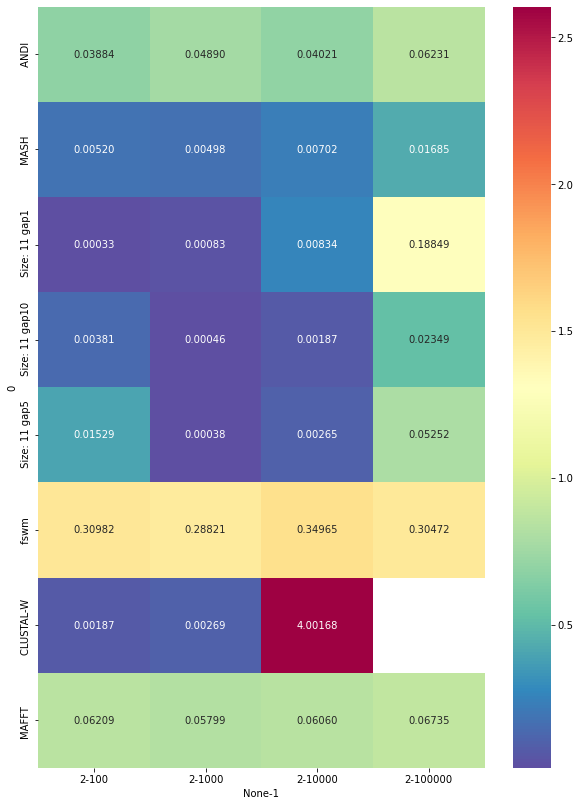

In [14]:
benchmark = pd.DataFrame(Benchmarking)
benchmark[benchmark.iloc[:,2] > 5 ][2] = 5
benchmark
matrix = pd.pivot_table(data = benchmark, columns=[1],  index=[0])
matrix.droplevel(0, axis=1) 
matrix.droplevel(1, axis=1) 
colormap = sns.color_palette("vlag")

plt.figure(figsize=(10, 14))

sns.heatmap(np.log10((matrix)*100+1), annot=matrix, fmt='.5f', cmap='Spectral_r')
